## Gain-Loss Q-learning Algorithm


In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

class Qlearning:
    def __init__(self, alphaG, alphaL):
        # Gain-learning rate
        self.alphaG = alphaG
        # Loss-Learning Rate
        self.alphaL = alphaL
        self.Q = {'A':0.5, 'B':0.5, 'C':0.5, 'N':0.5, 'D':0.5, 'E':0.5, 'F':0.5} # Initialize all Q-values at 0.5
        self.prob = {'A':0.9, 'B':0.75, 'C':0.6, 'D':0.45, 'E':0.3,'F':0.15} # Map choices to respective reward probability

    # Compute rewards based on stimuli reward probability
    def reward(self, action):
        return np.random.choice([1,0], p=[self.prob[action], 1-self.prob[action]])


    # Update Q-values
    def update(self, action):
        reward = self.reward(action)
        if reward > 0:
            self.Q[action] += self.alphaG * (reward - self.Q[action]) # Use gain-learning rate if reward perceived as gain
        else:
            self.Q[action] += self.alphaL * (reward - self.Q[action]) # Use loss-learning rate if reward perceived as loss
        return reward

    # Select an action using softmax probability function
    def chooseAction(self, a, b, beta=1.0):
        prob = np.exp(self.Q[a]/beta) / (np.exp(self.Q[a]/beta) + np.exp(self.Q[b]/beta))
        return np.random.choice([a,b], p=[prob, 1-prob])

    # Train model to learn Q-values
    def train(self, epochs = 10000):
      for _ in range(epochs):
        action = self.chooseAction('A', 'B')
        self.update(action)

    # # Test model for positive reinforcement (choose A over Neutral 'N') and avoidance (avoid choosing B)
    # def test(self, ntrials = 1000):
    #   success = 0
    #   avoided = 0
    #   for _ in range(ntrials):
    #     action1 = self.chooseAction('A', 'N')
    #     action2 = self.chooseAction('B', 'N')
    #     if action1 == 'A':
    #       success += 1
    #     if action2 == 'N':
    #       avoided += 1
    #   return (success/ntrials, avoided/ntrials)


## Test 1: Q convergence

In [ ]:
ntrials = list(range(50))
alpharange = list(range(1, 11))
acc_output = []
avoided = []

# From Paper: Small learning rates (0.05) should lead to improved convergence
# High learning rates (0.8) should lead to significant oscillation due to recency effects
QvalsB = []
QvalsC = []

Qvals2B = []
Qvals2C = []

Qtest1 = Qlearning(0.05, 0.05)
Qtest2 = Qlearning(0.8, 0.8)
for _ in ntrials:
  choice = Qtest1.chooseAction('B', 'C')
  Qtest1.update(choice)
  QvalsB.append(Qtest1.Q['B'])
  QvalsC.append(Qtest1.Q['C'])
  choice = Qtest2.chooseAction('B', 'C')
  Qtest2.update(choice)
  Qvals2B.append(Qtest2.Q['B'])
  Qvals2C.append(Qtest2.Q['C'])


plt.plot(ntrials, QvalsB, label='p=0.2, alpha=0.05')
plt.plot(ntrials, QvalsC, label='p=0.3, alpha=0.05')
plt.plot(ntrials, Qvals2B,label='p=0.2, alpha=0.8')
plt.plot(ntrials, Qvals2C, label='p=0.3, alpha=0.08')
plt.title("Effect of learning rates on Q-value convergence")
plt.xlabel(r"$Trial$")
plt.ylabel("Q")
plt.tight_layout()
plt.legend()
plt.show()

## Test 2: Win-Stay and Lose-Shift

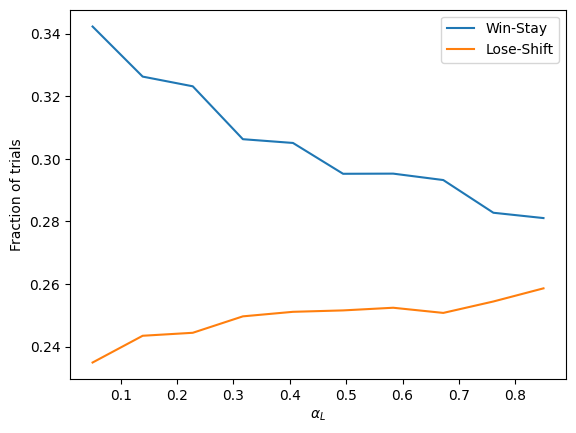

In [ ]:
winstayall = []
loseshiftall = []
alpharange = np.linspace(0.05, 0.85, 10)
for alphaL in alpharange:
  ntrials = 201
  winstay = 0
  loseshift = 0
  for _ in range(100):
    Qtest = Qlearning(0.05, alphaL)
    choices = []
    rewards = []
    for _ in range(ntrials):
      choice = Qtest.chooseAction('A','B')
      choices.append(choice)
      rewards.append(Qtest.update(choice))
    for i in range(1, ntrials):
      if rewards[i - 1] == 0 and choices[i-1] != choices[i]:
        loseshift += 1/(ntrials - 1)
      elif rewards[i - 1] == 1 and choices[i - 1] == choices[i]:
        winstay += 1/(ntrials - 1)
  winstayall.append(winstay/100)
  loseshiftall.append(loseshift/100)

plt.plot(np.linspace(0.05, 0.85, 10), winstayall, label="Win-Stay")
plt.plot(np.linspace(0.05, 0.85, 10), loseshiftall, label="Lose-Shift")
plt.xlabel(r"$\alpha_L$")
plt.ylabel("Fraction of trials")
plt.legend()
plt.show()



## Discriminating Positive and Negative Rewards

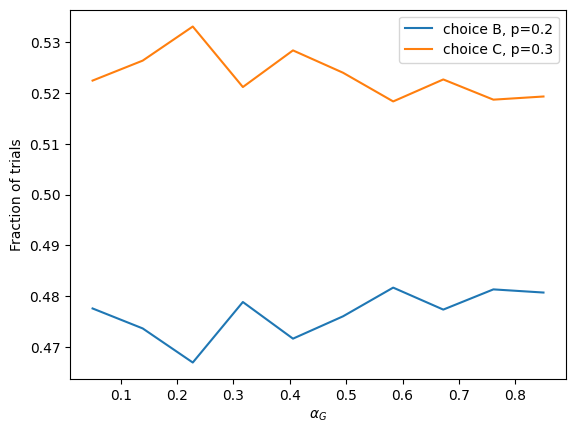

In [ ]:
chooseA = []
chooseD = []
alpharange = np.linspace(0.05, 0.85, 10)
for alphaG in alpharange:
  ntrials = 201
  A = 0
  D = 0
  for _ in range(200):
    Qtest = Qlearning(alphaG, 0.05)
    for _ in range(ntrials):
      choice = Qtest.chooseAction('B','C')
      if choice == 'B':
        A += 1/ntrials
      else:
        D += 1/ntrials
      Qtest.update(choice)
  chooseA.append(A/200)
  chooseD.append(D/200)

plt.plot(np.linspace(0.05, 0.85, 10), chooseA, label="choice B, p=0.2")
plt.plot(np.linspace(0.05, 0.85, 10), chooseD, label="choice C, p=0.3")
plt.xlabel(r"$\alpha_G$")
plt.ylabel("Fraction of trials")
plt.legend()
plt.show()


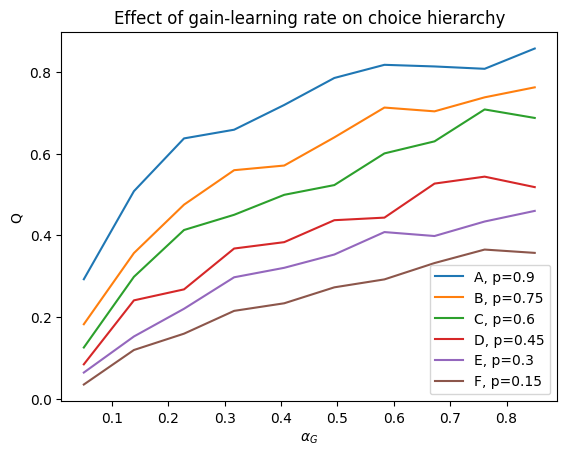

In [ ]:
Q_A = []
Q_B = []
Q_C = []
Q_D = []
Q_E = []
Q_F = []
alpharange = np.linspace(0.05, 0.85, 10)
for alphaG in alpharange:
  ntrials = 100
  q_A = 0
  q_B = 0
  q_C = 0
  q_D = 0
  q_E = 0
  q_F = 0
  for _ in range(ntrials):
    pairs = 100
    Qtest = Qlearning(alphaG, 0.5)
    for _ in range(pairs):
      choice = Qtest.chooseAction('A','B')
      Qtest.update(choice)
      choice = Qtest.chooseAction('C','D')
      Qtest.update(choice)
      choice = Qtest.chooseAction('E','F')
      Qtest.update(choice)
    q_A += Qtest.Q['A']
    q_B += Qtest.Q['B']
    q_C += Qtest.Q['C']
    q_D += Qtest.Q['D']
    q_E += Qtest.Q['E']
    q_F += Qtest.Q['F']
  Q_A.append(q_A/ntrials)
  Q_B.append(q_B/ntrials)
  Q_C.append(q_C/ntrials)
  Q_D.append(q_D/ntrials)
  Q_E.append(q_E/ntrials)
  Q_F.append(q_F/ntrials)

plt.plot(alpharange, Q_A, label="A, p=0.9")
plt.plot(alpharange, Q_B, label="B, p=0.75")
plt.plot(alpharange, Q_C, label="C, p=0.6")
plt.plot(alpharange, Q_D, label="D, p=0.45")
plt.plot(alpharange, Q_E, label="E, p=0.3")
plt.plot(alpharange, Q_F, label="F, p=0.15")
plt.legend()
plt.xlabel(r'$\alpha_G$')
plt.ylabel('Q')
plt.title('Effect of gain-learning rate on choice hierarchy')
plt.show()

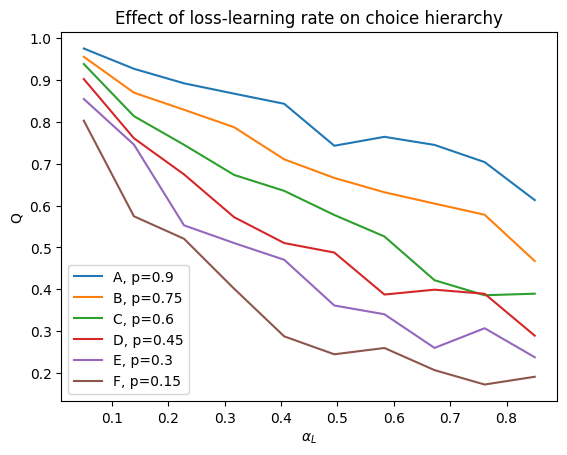

In [ ]:
Q_A = []
Q_B = []
Q_C = []
Q_D = []
Q_E = []
Q_F = []
alpharange = np.linspace(0.05, 0.85, 10)
for alphaG in alpharange:
  ntrials = 100
  q_A = 0
  q_B = 0
  q_C = 0
  q_D = 0
  q_E = 0
  q_F = 0
  for _ in range(ntrials):
    pairs = 100
    Qtest = Qlearning(0.5, alphaG)
    for _ in range(pairs):
      choice = Qtest.chooseAction('A','B')
      Qtest.update(choice)
      choice = Qtest.chooseAction('C','D')
      Qtest.update(choice)
      choice = Qtest.chooseAction('E','F')
      Qtest.update(choice)
    q_A += Qtest.Q['A']
    q_B += Qtest.Q['B']
    q_C += Qtest.Q['C']
    q_D += Qtest.Q['D']
    q_E += Qtest.Q['E']
    q_F += Qtest.Q['F']
  Q_A.append(q_A/ntrials)
  Q_B.append(q_B/ntrials)
  Q_C.append(q_C/ntrials)
  Q_D.append(q_D/ntrials)
  Q_E.append(q_E/ntrials)
  Q_F.append(q_F/ntrials)

plt.plot(alpharange, Q_A, label="A, p=0.9")
plt.plot(alpharange, Q_B, label="B, p=0.75")
plt.plot(alpharange, Q_C, label="C, p=0.6")
plt.plot(alpharange, Q_D, label="D, p=0.45")
plt.plot(alpharange, Q_E, label="E, p=0.3")
plt.plot(alpharange, Q_F, label="F, p=0.15")
plt.legend()
plt.xlabel(r'$\alpha_L$')
plt.ylabel('Q')
plt.title('Effect of loss-learning rate on choice hierarchy')
plt.show()

## Sanity Check

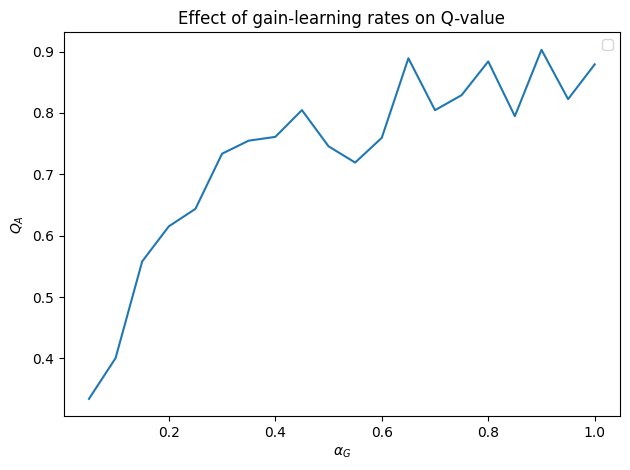

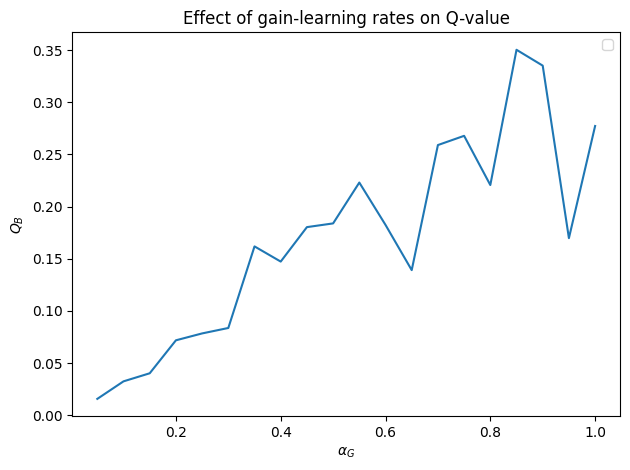

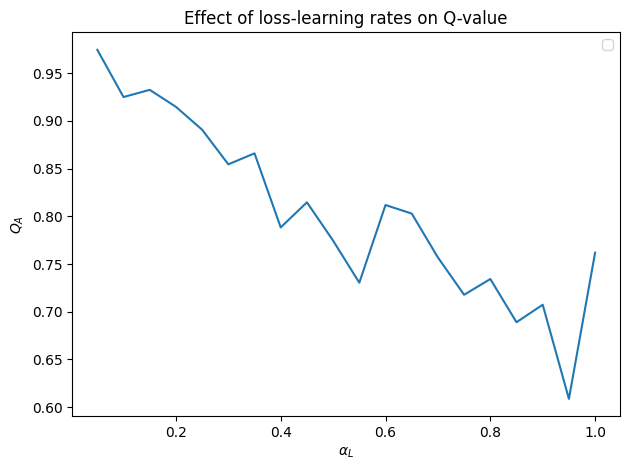

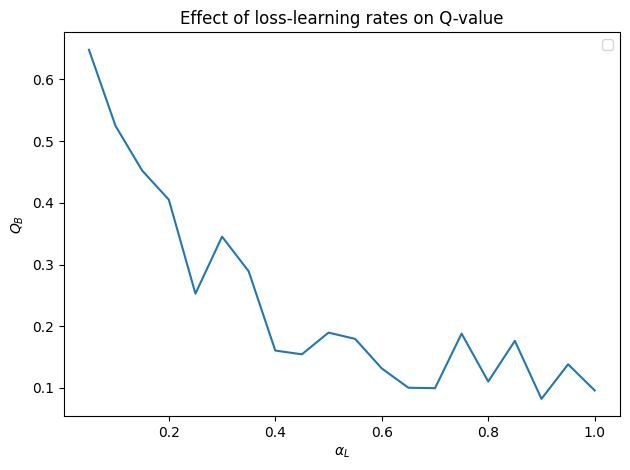

In [ ]:
Qvals = []
for alphaG in range(1, 21):
  Qtot = 0
  for _ in range(30):
    Qmod = Qlearning(alphaG/20, 0.5)
    Qmod.train()
    Qtot += Qmod.Q['A']
  Qvals.append(Qtot/30)


plt.plot(np.linspace(0.05, 1.0, 20), Qvals)
plt.title("Effect of gain-learning rates on Q-value")
plt.xlabel(r"$\alpha_G$")
plt.ylabel("$Q_A$")
plt.tight_layout()
plt.legend()
plt.show()

Qvals = []
for alphaG in range(1, 21):
  Qtot = 0
  for _ in range(30):
    Qmod = Qlearning(alphaG/20, 0.5)
    Qmod.train()
    Qtot += Qmod.Q['B']
  Qvals.append(Qtot/30)


plt.plot(np.linspace(0.05, 1.0, 20), Qvals)
plt.title("Effect of gain-learning rates on Q-value")
plt.xlabel(r"$\alpha_G$")
plt.ylabel("$Q_B$")
plt.tight_layout()
plt.legend()
plt.show()

Qvals = []
for alphaL in range(1, 21):
  Qtot = 0
  for _ in range(30):
    Qmod = Qlearning(0.5, alphaL/20)
    Qmod.train()
    Qtot += Qmod.Q['A']
  Qvals.append(Qtot/30)


plt.plot(np.linspace(0.05, 1.0, 20), Qvals)
plt.title("Effect of loss-learning rates on Q-value")
plt.xlabel(r"$\alpha_L$")
plt.ylabel("$Q_A$")
plt.tight_layout()
plt.legend()
plt.show()

Qvals = []
for alphaL in range(1, 21):
  Qtot = 0
  for _ in range(30):
    Qmod = Qlearning(0.5, alphaL/20)
    Qmod.train()
    Qtot += Qmod.Q['B']
  Qvals.append(Qtot/30)


plt.plot(np.linspace(0.05, 1.0, 20), Qvals)
plt.title("Effect of loss-learning rates on Q-value")
plt.xlabel(r"$\alpha_L$")
plt.ylabel("$Q_B$")
plt.tight_layout()
plt.legend()
plt.show()

## Testing Time to Convergence

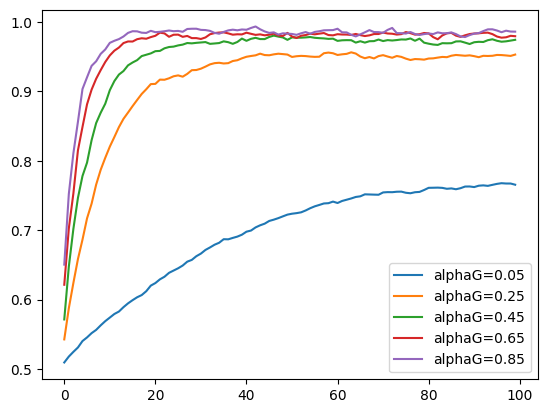

In [ ]:

alpharange = np.linspace(0.05, 0.85, 5)
# Varying Alpha
ntrials = 100
for alpha in alpharange:
  Qvals = [0 for _ in range(ntrials)]
  for _ in range(100):
    Qtest = Qlearning(alpha, 0.05)
    for i in range(ntrials):
      choice = Qtest.chooseAction('A', 'B')
      Qtest.update(choice)
      Qvals[i] += Qtest.Q['A']/100
  plt.plot(list(range(ntrials)), Qvals, label=f"alphaG={round(alpha,3)}")
plt.legend()
plt.show()

